# Parità

Import librerie necessarie
- `numpy` per il calcolo scientifico con le matrici
- `train_test_split` da `sklearn` per dividere il dataset tra train e test
- `keras` per la rete di deep learning
- `matplotlib` per creare i grafici

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt

Creiamo il dataset con numeri randomici

In [23]:
numero_test = 10000
X = np.random.randint(0, 1000, size=numero_test)
y = X % 2  # 0 per pari, 1 per dispari

Prepara i dati convertendo il numero da **intero** a **matrice a indice 10** contenente i 10 bit del numero in formato binario.

In [11]:
X_binary = np.array([list(map(int, np.binary_repr(x, width=10))) for x in X])

Divide il dataset in train e test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_binary, y, test_size=0.2, random_state=42)

Crea il modello di **rete neurale**  
- **1** layer da **1** neurone,
- dimensione della matrice di ingresso = 10,
- funzione di attivazione = sigmoide,
- ottimizzatore = algoritmo Adam

In [37]:
model = Sequential()
model.add(Dense(1, input_dim=10, activation='sigmoid'))  # Output: 0-1 (pari-dispari)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Crea il grafico di visualizzazione della rete

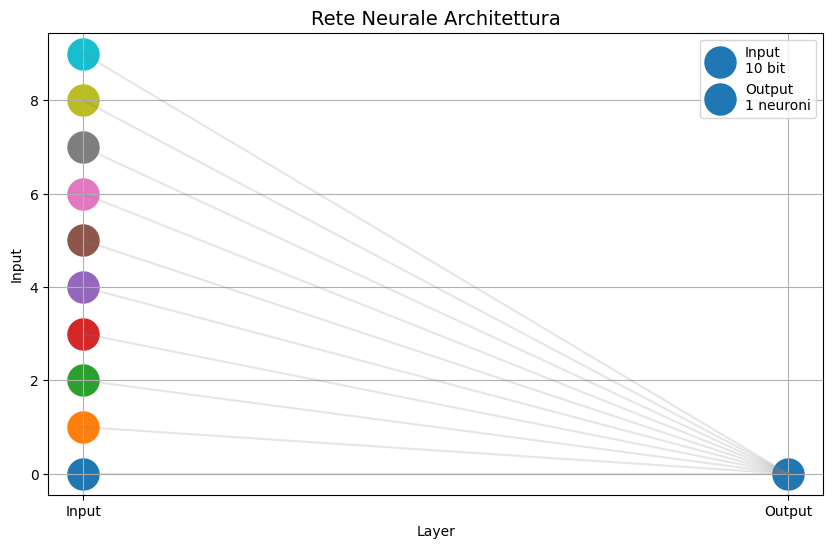

In [33]:
def plot_ann(model):
    layers = [layer.units for layer in model.layers if hasattr(layer, 'units')]
    layers.insert(0, model.input_shape[1])  # Aggiunge l'input

    plt.figure(figsize=(10, 6))
    for i, units in enumerate(layers):
        layer_name = f'Layer {i}'
        if i == 0:
            layer_name = 'Input'
        elif i == len(layers) - 1:
            layer_name = 'Output'

        # Disegna i neuroni
        for j in range(units):
          if i == 0:
            plt.scatter(i, j, s=500, label=f'{layer_name}\n{units} bit' if j == 0 else "")
          else:
            plt.scatter(i, j, s=500, label=f'{layer_name}\n{units} neuroni' if j == 0 else "")

    # Collegamenti tra neuroni (semplificato)
    for i in range(len(layers) - 1):
        for j in range(layers[i]):
            for k in range(layers[i + 1]):
                plt.plot([i, i + 1], [j, k], 'gray', alpha=0.2)

    plt.title("Rete Neurale Architettura", fontsize=14)
    plt.xlabel("Layer")
    plt.ylabel("Input")
    plt.xticks(range(len(layers)), ['Input'] + [f'Hidden {i}' for i in range(1, len(layers)-1)] + ['Output'])
    plt.grid(True)
    plt.legend()
    plt.show()

plot_ann(model)

Addestriamo il modello di rete neurale tramite dati di train.
- Numero di epoche di addestramento = 20

In [38]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=20,
                    verbose=1)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7151 - loss: 0.5867 - val_accuracy: 0.8160 - val_loss: 0.5445
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8438 - loss: 0.5227 - val_accuracy: 0.9310 - val_loss: 0.4888
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9558 - loss: 0.4734 - val_accuracy: 0.9885 - val_loss: 0.4425
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9951 - loss: 0.4305 - val_accuracy: 1.0000 - val_loss: 0.4020
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.3886 - val_accuracy: 1.0000 - val_loss: 0.3671
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.3566 - val_accuracy: 1.0000 - val_loss: 0.3363
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.3274 - val_accuracy: 1.0000 - val_loss: 0.3082
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.3000 - val_accuracy: 1.

Mostriamo l'andamento grafico della perdita e dell'accuratezza nelle diverse epoche

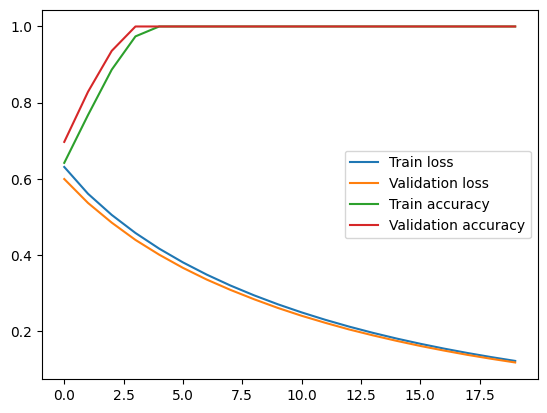

In [16]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

Valuta l'accuratezza del modello

In [41]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Perdita sul test set: {loss:.4f}\nAccuracy sul test set: {accuracy:.4f}")

Perdita sul test set: 0.1084
Accuracy sul test set: 1.0000


Eseguiamo un test con diversi numeri

In [46]:
test_numbers = [23, 42, 7, 100, 999, 12, 1023, 0, 8, 55, 88, 123]

def predict_parity(number):
    binary = np.array([list(map(int, np.binary_repr(number, width=10)))])
    prediction = model.predict(binary)
    return "pari" if prediction < 0.5 else "dispari"

for num in test_numbers:
    print(f"{num} è {predict_parity(num)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
23 è dispari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
42 è pari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
7 è dispari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
100 è pari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
999 è dispari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
12 è pari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1023 è dispari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
0 è pari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
8 è pari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
55 è dispari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
88 è pari
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
123 è dispari
